<a href="https://colab.research.google.com/github/Cheney-He/Cheney-He.github.io/blob/main/5054_mid_p4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROBLEM 4

In [ ]:
install.packages("glmnet")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘iterators’, ‘foreach’, ‘shape’, ‘Rcpp’, ‘RcppEigen’




In [ ]:
library(glmnet);

diab.data.train=read.csv("diabetes_train.csv")
diab.data.test=read.csv("diabetes_test.csv")

Loading required package: Matrix

Loaded glmnet 4.1-8



In [ ]:
diab.data.train=subset(diab.data.train,select=-c(age.1,sex.1,bmi.1,map.1,tc.1,ldl.1,hdl.1,tch.1,ltg.1,glu.1,age.2,bmi.2,map.2,tc.2,ldl.2,hdl.2,tch.2,ltg.2,glu.2))
diab.data.test=subset(diab.data.test,select=-c(age.1,sex.1,bmi.1,map.1,tc.1,ldl.1,hdl.1,tch.1,ltg.1,glu.1,age.2,bmi.2,map.2,tc.2,ldl.2,hdl.2,tch.2,ltg.2,glu.2))


In [ ]:
grid=10^seq(4,-2,length=100)
x=model.matrix(Y~.,diab.data.train)[,-1]
y=diab.data.train$Y

Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”


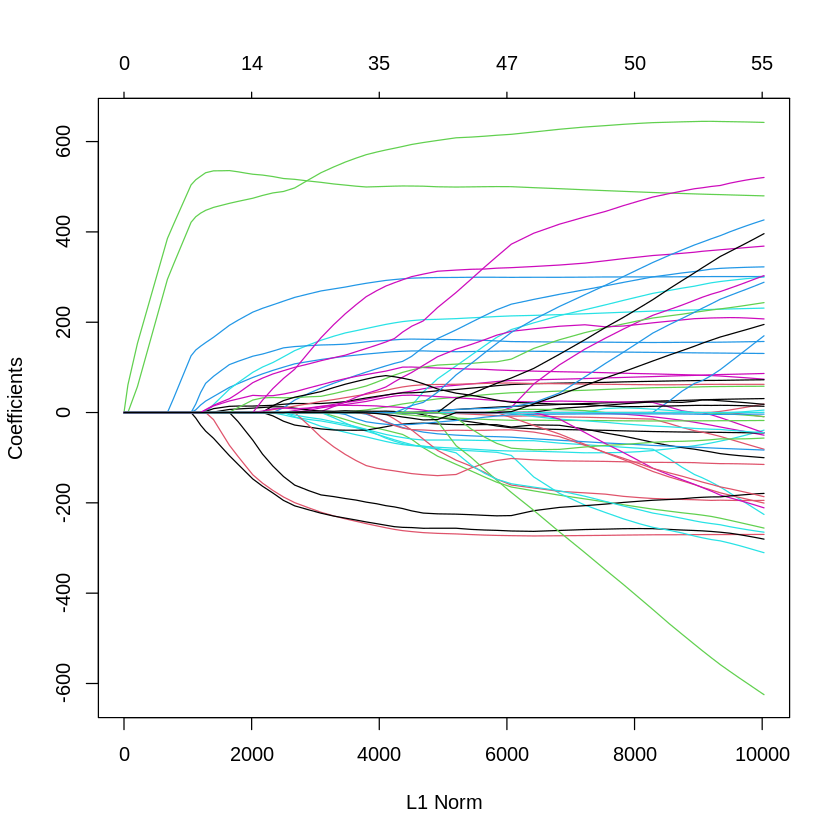

In [ ]:
lasso.mod=glmnet(x,y,alpha=1,lambda=grid)
plot(lasso.mod)

In [ ]:
lasso.mod$beta[1:30,40:59]

  [[ suppressing 20 column names ‘s39’, ‘s40’, ‘s41’ ... ]]



30 x 20 sparse Matrix of class "dgCMatrix"
                                                                       
age      .         .         .        .        .        .        .     
sex      .         .         .        .        .        .        .     
bmi     61.19573 153.30136 224.0172 285.5201 339.0122 385.5369 416.6300
map      .         .         .        .        .        .       31.2602
tc       .         .         .        .        .        .        .     
ldl      .         .         .        .        .        .        .     
hdl      .         .         .        .        .        .        .     
tch      .         .         .        .        .        .        .     
ltg      .        57.55162 129.8938 192.8142 247.5392 295.1362 328.2691
glu      .         .         .        .        .        .        .     
age.sex  .         .         .        .        .        .        .     
age.bmi  .         .         .        .        .        .        .     
age.map  .         . 

从图中可以看出系数与
 norm 和不同 lambda 的系数，我们可以发现 bmi 和 ltg 在该模型中起着最显着的作用。我们知道bmi是“身体质量指数”，所以这个模型说明了一个事实：胖人患这种病的概率更大，并且进展为糖尿病。

同时，我们发现大多数基线变量交互作用的影响小于原始基线变量，这意味着如果我们想要简单的模型，我们可以在模型中删除这个交互项。

**Q2**

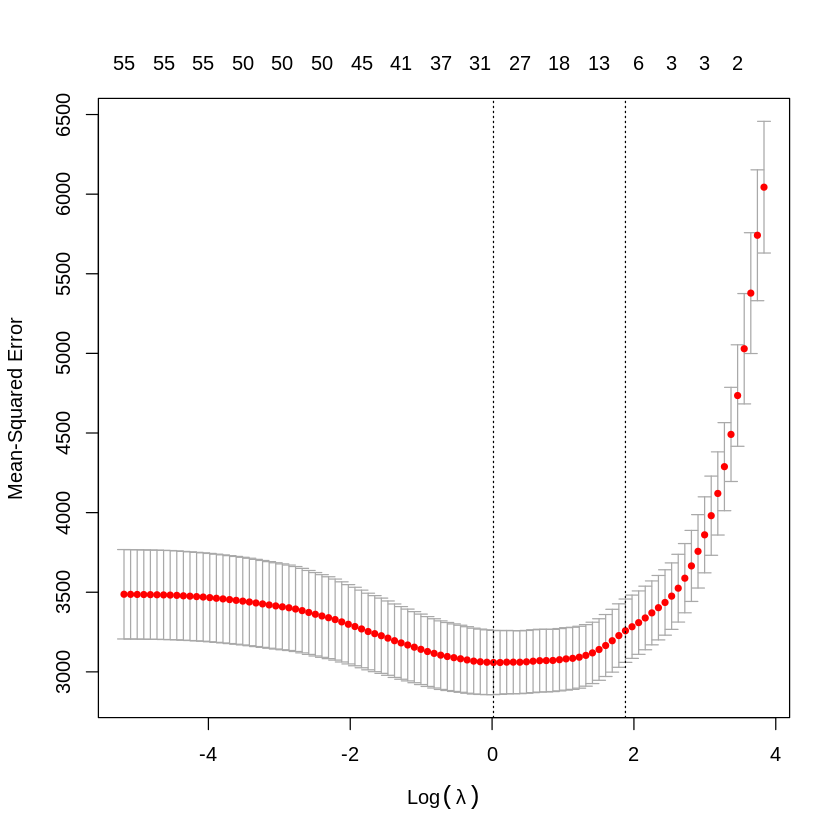

In [ ]:
set.seed(10)

cv.lasso=cv.glmnet(x,y,alpha=1,nfolds=10)
plot(cv.lasso)

In [ ]:
best.lambda=cv.lasso$lambda.min
best.lambda

[1] 1.019942

The best lambda value according CV error is 1.01994178949956

In [ ]:
cv.lasso.coef=predict(cv.lasso,type="coefficients",s=best.lambda)[1:56,]
cv.lasso.coef=cv.lasso.coef[cv.lasso.coef!=0]
# the coefficients of the best linear model using the best lambda value
cv.lasso.coef
# how many variables are included in the mode？
length(cv.lasso.coef)-1
# what are they？
names(cv.lasso.coef)[-1]

(Intercept)          sex          bmi          map           tc          hdl 
 150.6764170 -234.4802828  504.0208822  277.2774334  -42.7496628 -233.2101625 
         ltg          glu      age.sex      age.bmi      age.ldl      age.hdl 
 553.1448471  124.1172411  175.3753853   21.7194631  -14.2095821   72.6529172 
     age.ltg      age.glu      sex.bmi      sex.map      sex.ldl      sex.hdl 
  74.1424494   23.5485135   32.3006090    0.4728138  -28.5663481   17.1045868 
     bmi.map       bmi.tc      bmi.hdl      bmi.ltg      map.ldl      map.hdl 
 150.9583356  -22.0340157  -39.0078272   47.4052796   22.1689727   61.7477441 
     map.glu       tc.hdl       tc.tch       tc.ltg      ldl.ltg      ldl.glu 
  -2.9050802   15.5959083 -189.6140213  -90.2380941  215.4696265    3.5776042 
     tch.ltg      tch.glu 
 -25.1067750  126.3173561

[1] 31

[1] "sex"     "bmi"     "map"     "tc"      "hdl"     "ltg"     "glu"    
 [8] "age.sex" "age.bmi" "age.ldl" "age.hdl" "age.ltg" "age.glu" "sex.bmi"
[15] "sex.map" "sex.ldl" "sex.hdl" "bmi.map" "bmi.tc"  "bmi.hdl" "bmi.ltg"
[22] "map.ldl" "map.hdl" "map.glu" "tc.hdl"  "tc.tch"  "tc.ltg"  "ldl.ltg"
[29] "ldl.glu" "tch.ltg" "tch.glu"

**q3**



In [ ]:
x.test=model.matrix(Y~.,diab.data.test)[,-1]
y.gt=diab.data.test$Y

y.pred=predict(cv.lasso,s=best.lambda,newx=x.test)
mean((y.pred-y.gt)^2)

[1] 3064.72

The mean test error is 3064.71954958748

**Q4**

In [ ]:
# 加载必要的库
library(glmnet)

# 设定随机数种子以保证结果可重复
set.seed(123)

# 原始数据
x <- matrix(rnorm(100*20), 100, 20)
y <- rnorm(100)

# 用原始数据拟合 lasso 模型并用交叉验证选择 lambda
cv.lasso <- cv.glmnet(x, y, alpha=1)
best_lambda <- cv.lasso$lambda.min  # 选择最佳的 lambda 值

# 初始化一个矩阵来保存 bootstrap 估计值
bootstrap_estimates <- matrix(NA, nrow=1000, ncol=ncol(x))

# 对每个 bootstrap 样本进行操作
for(i in 1:1000){
  # 生成 bootstrap 样本
  bootstrap_indices <- sample(1:nrow(x), replace=TRUE)
  bootstrap_x <- x[bootstrap_indices, ]
  bootstrap_y <- y[bootstrap_indices]

  # 拟合 lasso 模型
  lasso.mod <- glmnet(bootstrap_x, bootstrap_y, alpha=1, lambda=best_lambda)

  # 提取并保存估计值
  bootstrap_estimates[i, ] <- as.matrix(coef(lasso.mod))[-1, ]  # 删除截距项
}

# 计算置信区间
lower_bounds <- apply(bootstrap_estimates, 2, function(x) quantile(x, 0.025))
upper_bounds <- apply(bootstrap_estimates, 2, function(x) quantile(x, 0.975))

# 结果
confidence_intervals <- cbind(lower_bounds, upper_bounds)


In [ ]:
print(confidence_intervals)

       lower_bounds upper_bounds
 [1,] -1.097900e-01   0.00000000
 [2,] -6.293812e-02   0.00000000
 [3,]  0.000000e+00   0.15577007
 [4,] -4.658316e-02   0.01693588
 [5,]  0.000000e+00   0.03863861
 [6,] -1.518254e-02   0.00000000
 [7,] -1.325403e-05   0.04462812
 [8,] -1.195060e-01   0.00000000
 [9,] -3.436530e-02   0.00000000
[10,]  0.000000e+00   0.07532111
[11,]  0.000000e+00   0.13029818
[12,]  0.000000e+00   0.06618111
[13,] -1.352938e-01   0.00000000
[14,]  0.000000e+00   0.08327156
[15,]  0.000000e+00   0.06143462
[16,] -5.049594e-02   0.00000000
[17,] -6.594075e-03   0.02198480
[18,] -4.451632e-02   0.00000000
[19,]  0.000000e+00   0.04049005
[20,] -1.272219e-01   0.00000000


**q5**

In [ ]:
df_train=read.csv("diabetes_train.csv")
df_test=read.csv("diabetes_test.csv")

[1] "Best lambda:  0.0247361472448456"


75 x 1 sparse Matrix of class "dgCMatrix"
                       s0
(Intercept)  2.052514e-01
age          .           
sex          4.551729e+00
bmi         -1.053333e+01
map         -8.836324e+00
tc           .           
ldl          .           
hdl          3.116700e+00
tch          .           
ltg         -1.636123e+01
glu         -1.693674e+00
age.1        .           
sex.1        1.021307e+00
bmi.1        .           
map.1       -1.884491e-04
tc.1         .           
ldl.1        .           
hdl.1        2.463438e-01
tch.1        .           
ltg.1       -1.426474e-01
glu.1       -2.920000e-01
age.2        .           
bmi.2        .           
map.2        .           
tc.2         .           
ldl.2        .           
hdl.2        .           
tch.2        .           
ltg.2        .           
glu.2        .           
age.sex     -5.164317e-01
age.bmi      .           
age.map      .           
age.tc       .           
age.ldl      .           
age.hdl      .        

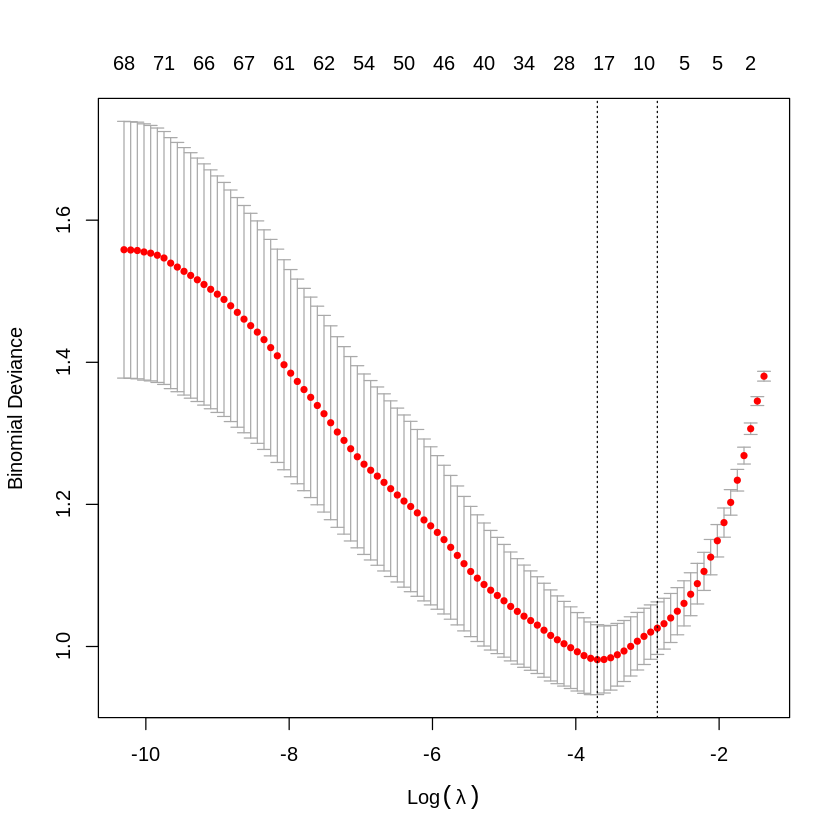

In [ ]:
# 将Y变量转化为二元分类变量
df_train$Y <- ifelse(df_train$Y < 150, 1, 0)

# 分离出特征和标签
X_train <- model.matrix(Y ~ .-1, data = df_train) # 去掉截距项
y_train <- df_train$Y

# 执行LASSO logistic回归并使用10-fold交叉验证选择最佳的lambda值
cv.model <- cv.glmnet(X_train, y_train, family = "binomial", alpha = 1, nfolds = 10)

# 打印和选择最佳的lambda值
best_lambda <- cv.model$lambda.min
print(paste("Best lambda: ", best_lambda))

# 使用最佳的lambda重新训练模型
model <- glmnet(X_train, y_train, family = "binomial", alpha = 1, lambda = best_lambda)

# 打印模型中包含的变量数量和名称
coef(model)

# 绘制CV错误图示
plot(cv.model)

In [ ]:
best_lambda <- cv.model$lambda.min
print(paste("Best lambda: ", best_lambda))

[1] "Best lambda:  0.0247361472448456"


In [ ]:
num_variables <- sum(coef(model) != 0)
print(paste("Number of variables in the model: ", num_variables))

[1] "Number of variables in the model:  17"


In [ ]:
# 获取模型的系数
model_coefs <- coef(model)

# 找到非零系数的索引，即为包含在模型中的变量的索引
included_variables_indices <- which(model_coefs != 0)

# 获取包含在模型中的变量的名称
included_variables <- rownames(model_coefs)[included_variables_indices]

# 输出包含在模型中的变量的名称
print(included_variables)

 [1] "(Intercept)" "sex"         "bmi"         "map"         "hdl"        
 [6] "ltg"         "glu"         "sex.1"       "map.1"       "hdl.1"      
[11] "ltg.1"       "glu.1"       "age.sex"     "age.ltg"     "sex.bmi"    
[16] "bmi.map"     "ldl.tch"    


变量名 "(Intercept)" "sex"         "bmi"         "map"         "hdl"        
 "ltg"         "glu"         "sex.1"       "map.1"       "hdl.1"      
 "ltg.1"       "glu.1"       "age.sex"     "age.ltg"     "sex.bmi"    
 "bmi.map"     "ldl.tch"  